In [2]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Timelevel==1]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/160
582/582 [==============================] - 1s 1ms/step - loss: 0.4966 - acc: 0.7736
Epoch 2/160
582/582 [==============================] - 0s 299us/step - loss: 0.4754 - acc: 0.7788
Epoch 3/160
 50/582 [=>............................] - ETA: 0s - loss: 0.4440 - acc: 0.7950

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


582/582 [==============================] - 0s 319us/step - loss: 0.4541 - acc: 0.7904
Epoch 4/160
582/582 [==============================] - 0s 338us/step - loss: 0.4344 - acc: 0.7865
Epoch 5/160
582/582 [==============================] - 0s 292us/step - loss: 0.4379 - acc: 0.7818
Epoch 6/160
582/582 [==============================] - 0s 310us/step - loss: 0.4282 - acc: 0.7895
Epoch 7/160
582/582 [==============================] - 0s 298us/step - loss: 0.4297 - acc: 0.7771
Epoch 8/160
582/582 [==============================] - 0s 299us/step - loss: 0.4178 - acc: 0.7796
Epoch 9/160
582/582 [==============================] - 0s 281us/step - loss: 0.4093 - acc: 0.7942
Epoch 10/160
582/582 [==============================] - 0s 284us/step - loss: 0.4142 - acc: 0.7908
Epoch 11/160
582/582 [==============================] - 0s 314us/step - loss: 0.4246 - acc: 0.7822
Epoch 12/160
582/582 [==============================] - 0s 303us/step - loss: 0.4144 - acc: 0.7934
Epoch 13/160
582/582 [=======

Epoch 86/160
582/582 [==============================] - 0s 344us/step - loss: 0.3744 - acc: 0.8170
Epoch 87/160
582/582 [==============================] - 0s 315us/step - loss: 0.3714 - acc: 0.8179
Epoch 88/160
582/582 [==============================] - 0s 347us/step - loss: 0.3660 - acc: 0.8256
Epoch 89/160
582/582 [==============================] - 0s 334us/step - loss: 0.3609 - acc: 0.8303
Epoch 90/160
582/582 [==============================] - 0s 376us/step - loss: 0.3651 - acc: 0.8166
Epoch 91/160
582/582 [==============================] - 0s 394us/step - loss: 0.3636 - acc: 0.8256
Epoch 92/160
582/582 [==============================] - 0s 339us/step - loss: 0.3615 - acc: 0.8308
Epoch 93/160
582/582 [==============================] - 0s 368us/step - loss: 0.3686 - acc: 0.8235
Epoch 94/160
582/582 [==============================] - 0s 408us/step - loss: 0.3602 - acc: 0.8286
Epoch 95/160
582/582 [==============================] - 0s 299us/step - loss: 0.3783 - acc: 0.8149
Epoch 96/1

0.8082191780821918

Accuracy Timelevel 1


In [3]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Timelevel==2]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
1324/1324 [==============================] - 1s 731us/step - loss: 0.4730 - acc: 0.7744
Epoch 2/160
1324/1324 [==============================] - 0s 336us/step - loss: 0.4233 - acc: 0.7863
Epoch 3/160
1324/1324 [==============================] - 0s 350us/step - loss: 0.4207 - acc: 0.7895
Epoch 4/160
1324/1324 [==============================] - 0s 302us/step - loss: 0.4076 - acc: 0.7957
Epoch 5/160
1324/1324 [==============================] - 0s 330us/step - loss: 0.4019 - acc: 0.8048
Epoch 6/160
1324/1324 [==============================] - 0s 294us/step - loss: 0.3996 - acc: 0.7993
Epoch 7/160
1324/1324 [==============================] - 0s 332us/step - loss: 0.4040 - acc: 0.8021
Epoch 8/160
1324/1324 [==============================] - 1s 396us/step - loss: 0.3958 - acc: 0.8074
Epoch 9/160
1324/1324 [==============================] - 0s 257us/step - loss: 0.3988 - acc: 0.8012
Epoch 10/160
1324/1324 [==============================] - 1s 417us/step - loss: 0.3860 - acc: 0.81

0.7740963855421686

accuracy Timelevel 2

In [4]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Timelevel==3]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
1140/1140 [==============================] - 1s 948us/step - loss: 0.4481 - acc: 0.7908
Epoch 2/160
1140/1140 [==============================] - 0s 336us/step - loss: 0.3709 - acc: 0.8322
Epoch 3/160
1140/1140 [==============================] - 0s 329us/step - loss: 0.3652 - acc: 0.8294
Epoch 4/160
1140/1140 [==============================] - 0s 424us/step - loss: 0.3568 - acc: 0.8360
Epoch 5/160
1140/1140 [==============================] - 0s 256us/step - loss: 0.3599 - acc: 0.8305
Epoch 6/160
1140/1140 [==============================] - 0s 432us/step - loss: 0.3539 - acc: 0.8366
Epoch 7/160
1140/1140 [==============================] - ETA: 0s - loss: 0.3480 - acc: 0.842 - 1s 559us/step - loss: 0.3471 - acc: 0.8439
Epoch 8/160
1140/1140 [==============================] - 0s 375us/step - loss: 0.3400 - acc: 0.8390
Epoch 9/160
1140/1140 [==============================] - 0s 372us/step - loss: 0.3472 - acc: 0.8342
Epoch 10/160
1140/1140 [==============================] - 0s

1140/1140 [==============================] - 0s 61us/step

acc: 84.97%
0 1 0 0
1 0 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 1 0 0
1 0 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 0 0 0
0 0 0 1
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
1 0 0 0
1 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
1 0 0 0
1 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 1 0 0
1 0 0 0
1 0 0 0
0 1 0 0
0 0 0 0
1 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
1 0 0 0
1 0 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 0 1 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
1 0 0 0
1 0 0 0
0 1 0 0
1 0 0 0
1 0 0 0
0 1 0 0
1 0 0 0
1 0 0 0
1 0 0 0
0 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
1 0 0 0
0 0 0 0
0 1 0 0
0 0 0 0
0 1 0 0
1 0 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0 1 0 0
0

0.8216783216783217

accuracy Timelevel 3

In [6]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Timelevel==4]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
1215/1215 [==============================] - 1s 936us/step - loss: 0.4339 - acc: 0.8152
Epoch 2/160
1215/1215 [==============================] - 0s 321us/step - loss: 0.3888 - acc: 0.8319
Epoch 3/160
1215/1215 [==============================] - 0s 291us/step - loss: 0.3788 - acc: 0.8360
Epoch 4/160
1215/1215 [==============================] - 0s 295us/step - loss: 0.3728 - acc: 0.8342
Epoch 5/160
1215/1215 [==============================] - 0s 300us/step - loss: 0.3715 - acc: 0.8399
Epoch 6/160
1215/1215 [==============================] - 0s 300us/step - loss: 0.3733 - acc: 0.8434
Epoch 7/160
1215/1215 [==============================] - 0s 303us/step - loss: 0.3650 - acc: 0.8414
Epoch 8/160
1215/1215 [==============================] - 0s 370us/step - loss: 0.3659 - acc: 0.8430
Epoch 9/160
1215/1215 [==============================] - 0s 310us/step - loss: 0.3596 - acc: 0.8434
Epoch 10/160
1215/1215 [==============================] - 0s 308us/step - loss: 0.3639 - acc: 0.84

0.7894736842105263

accuracy timelevel 4

In [7]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Zone=='highway']

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
717/717 [==============================] - 1s 2ms/step - loss: 0.5040 - acc: 0.7503
Epoch 2/160
717/717 [==============================] - 0s 324us/step - loss: 0.4567 - acc: 0.7629
Epoch 3/160
717/717 [==============================] - 0s 336us/step - loss: 0.4448 - acc: 0.7810
Epoch 4/160
717/717 [==============================] - 0s 316us/step - loss: 0.4319 - acc: 0.7877
Epoch 5/160
717/717 [==============================] - 0s 323us/step - loss: 0.4399 - acc: 0.7779
Epoch 6/160
717/717 [==============================] - 0s 314us/step - loss: 0.4156 - acc: 0.8006
Epoch 7/160
717/717 [==============================] - 0s 365us/step - loss: 0.4119 - acc: 0.7964
Epoch 8/160
717/717 [==============================] - 0s 326us/step - loss: 0.4091 - acc: 0.7918
Epoch 9/160
717/717 [==============================] - 0s 324us/step - loss: 0.4057 - acc: 0.8006
Epoch 10/160
717/717 [==============================] - 0s 299us/step - loss: 0.4072 - acc: 0.8026
Epoch 11/160
717/71

0.7

accuracy zone: highway

In [8]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Zone=='market']

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
2272/2272 [==============================] - 2s 771us/step - loss: 0.3941 - acc: 0.8348
Epoch 2/160
2272/2272 [==============================] - 1s 326us/step - loss: 0.3492 - acc: 0.8543
Epoch 3/160
2272/2272 [==============================] - 1s 316us/step - loss: 0.3402 - acc: 0.8552
Epoch 4/160
2272/2272 [==============================] - 1s 327us/step - loss: 0.3351 - acc: 0.8577
Epoch 5/160
2272/2272 [==============================] - 1s 302us/step - loss: 0.3352 - acc: 0.8582
Epoch 6/160
2272/2272 [==============================] - 1s 326us/step - loss: 0.3326 - acc: 0.8561
Epoch 7/160
2272/2272 [==============================] - 1s 340us/step - loss: 0.3253 - acc: 0.8588
Epoch 8/160
2272/2272 [==============================] - 1s 316us/step - loss: 0.3220 - acc: 0.8586
Epoch 9/160
2272/2272 [==============================] - 1s 331us/step - loss: 0.3190 - acc: 0.8622
Epoch 10/160
2272/2272 [==============================] - 1s 300us/step - loss: 0.3166 - acc: 0.85

0.8717047451669596

accuracy zone:market

In [9]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[df_k.Zone=='normal_city']

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
1272/1272 [==============================] - 3s 2ms/step - loss: 0.4530 - acc: 0.7588
Epoch 2/160
1272/1272 [==============================] - 1s 414us/step - loss: 0.4233 - acc: 0.7653
Epoch 3/160
1272/1272 [==============================] - 0s 309us/step - loss: 0.4120 - acc: 0.7761
Epoch 4/160
1272/1272 [==============================] - 1s 448us/step - loss: 0.4065 - acc: 0.7744
Epoch 5/160
1272/1272 [==============================] - 1s 455us/step - loss: 0.4008 - acc: 0.7803
Epoch 6/160
1272/1272 [==============================] - 1s 482us/step - loss: 0.4011 - acc: 0.7744
Epoch 7/160
1272/1272 [==============================] - 1s 432us/step - loss: 0.3941 - acc: 0.7879
Epoch 8/160
1272/1272 [==============================] - 1s 480us/step - loss: 0.3885 - acc: 0.7844
Epoch 9/160
1272/1272 [==============================] - 0s 338us/step - loss: 0.3883 - acc: 0.7824
Epoch 10/160
1272/1272 [==============================] - 0s 359us/step - loss: 0.3909 - acc: 0.7877

0.7084639498432602

accuracy zone:normal_city

In [12]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='normal_city') & (df_k.Timelevel==1)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
185/185 [==============================] - 1s 7ms/step - loss: 0.5263 - acc: 0.7500
Epoch 2/160
185/185 [==============================] - 0s 357us/step - loss: 0.4417 - acc: 0.7703
Epoch 3/160
185/185 [==============================] - 0s 429us/step - loss: 0.4498 - acc: 0.7730
Epoch 4/160
185/185 [==============================] - 0s 352us/step - loss: 0.4379 - acc: 0.7811
Epoch 5/160
185/185 [==============================] - 0s 377us/step - loss: 0.4399 - acc: 0.7770
Epoch 6/160
185/185 [==============================] - 0s 385us/step - loss: 0.4312 - acc: 0.7784
Epoch 7/160
185/185 [==============================] - 0s 395us/step - loss: 0.4265 - acc: 0.7824
Epoch 8/160
185/185 [==============================] - 0s 415us/step - loss: 0.4280 - acc: 0.7838
Epoch 9/160
185/185 [==============================] - 0s 378us/step - loss: 0.4227 - acc: 0.7851
Epoch 10/160
185/185 [==============================] - 0s 403us/step - loss: 0.4195 - acc: 0.7905
Epoch 11/160
185/18

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7659574468085106

accuracy: normal_city and 1

In [14]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='normal_city') & (df_k.Timelevel==2)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
358/358 [==============================] - 2s 5ms/step - loss: 0.4808 - acc: 0.7486
Epoch 2/160
358/358 [==============================] - 0s 363us/step - loss: 0.4334 - acc: 0.7374
Epoch 3/160
358/358 [==============================] - 0s 358us/step - loss: 0.4292 - acc: 0.7563
Epoch 4/160
358/358 [==============================] - 0s 364us/step - loss: 0.4008 - acc: 0.7465
Epoch 5/160
358/358 [==============================] - 0s 382us/step - loss: 0.4006 - acc: 0.7591
Epoch 6/160
358/358 [==============================] - 0s 336us/step - loss: 0.3972 - acc: 0.7640
Epoch 7/160
358/358 [==============================] - 0s 419us/step - loss: 0.3927 - acc: 0.7703
Epoch 8/160
358/358 [==============================] - 0s 354us/step - loss: 0.3927 - acc: 0.7751
Epoch 9/160
358/358 [==============================] - 0s 412us/step - loss: 0.3879 - acc: 0.7793
Epoch 10/160
358/358 [==============================] - 0s 352us/step - loss: 0.3891 - acc: 0.7961
Epoch 11/160
358/35

0.6555555555555556

accuracy:normal_city and 2

In [21]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='normal_city') & (df_k.Timelevel==3)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
#scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
      #  if y_test_2.iloc[j][3]==1:
            #y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
337/337 [==============================] - 2s 7ms/step - loss: 0.4633 - acc: 0.7552
Epoch 2/160
337/337 [==============================] - 0s 358us/step - loss: 0.3873 - acc: 0.7596
Epoch 3/160
337/337 [==============================] - 0s 374us/step - loss: 0.3923 - acc: 0.7270
Epoch 4/160
337/337 [==============================] - 0s 349us/step - loss: 0.3813 - acc: 0.7559
Epoch 5/160
337/337 [==============================] - 0s 334us/step - loss: 0.3716 - acc: 0.7619
Epoch 6/160
337/337 [==============================] - 0s 358us/step - loss: 0.3639 - acc: 0.7797
Epoch 7/160
337/337 [==============================] - 0s 335us/step - loss: 0.3611 - acc: 0.7812
Epoch 8/160
337/337 [==============================] - 0s 382us/step - loss: 0.3606 - acc: 0.7797
Epoch 9/160
337/337 [==============================] - 0s 338us/step - loss: 0.3578 - acc: 0.7982
Epoch 10/160
337/337 [==============================] - 0s 345us/step - loss: 0.3573 - acc: 0.7878
Epoch 11/160
337/33

0.7529411764705882

normal_city and 3

Very_fast absent

In [22]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='normal_city') & (df_k.Timelevel==4)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
391/391 [==============================] - 3s 8ms/step - loss: 0.5185 - acc: 0.7621
Epoch 2/160
391/391 [==============================] - 0s 374us/step - loss: 0.4170 - acc: 0.7992
Epoch 3/160
391/391 [==============================] - 0s 391us/step - loss: 0.4042 - acc: 0.8063
Epoch 4/160
391/391 [==============================] - 0s 384us/step - loss: 0.3980 - acc: 0.8120
Epoch 5/160
391/391 [==============================] - 0s 409us/step - loss: 0.3952 - acc: 0.8120
Epoch 6/160
391/391 [==============================] - 0s 351us/step - loss: 0.3935 - acc: 0.8120
Epoch 7/160
391/391 [==============================] - 0s 380us/step - loss: 0.3965 - acc: 0.8133
Epoch 8/160
391/391 [==============================] - 0s 333us/step - loss: 0.3920 - acc: 0.8075
Epoch 9/160
391/391 [==============================] - 0s 411us/step - loss: 0.3896 - acc: 0.8075
Epoch 10/160
391/391 [==============================] - 0s 415us/step - loss: 0.3933 - acc: 0.8152
Epoch 11/160
391/39

0.8367346938775511

accuracy normal_city and 4

In [2]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='highway') & (df_k.Timelevel==1)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
#scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
       # if y_test_2.iloc[j][3]==1:
        #    y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
131/131 [==============================] - 1s 6ms/step - loss: 0.5565 - acc: 0.7500
Epoch 2/160
131/131 [==============================] - 0s 367us/step - loss: 0.5139 - acc: 0.7500
Epoch 3/160
131/131 [==============================] - 0s 366us/step - loss: 0.5006 - acc: 0.7214
Epoch 4/160
131/131 [==============================] - 0s 356us/step - loss: 0.4813 - acc: 0.7538
Epoch 5/160
131/131 [==============================] - 0s 359us/step - loss: 0.4514 - acc: 0.7691
Epoch 6/160
131/131 [==============================] - 0s 430us/step - loss: 0.4342 - acc: 0.8149
Epoch 7/160
131/131 [==============================] - 0s 420us/step - loss: 0.4161 - acc: 0.8187
Epoch 8/160
131/131 [==============================] - 0s 356us/step - loss: 0.4046 - acc: 0.8168
Epoch 9/160
131/131 [==============================] - 0s 365us/step - loss: 0.4082 - acc: 0.8111
Epoch 10/160
131/131 [==============================] - 0s 375us/step - loss: 0.3991 - acc: 0.8187
Epoch 11/160
131/13

131/131 [==============================] - 0s 407us/step - loss: 0.3579 - acc: 0.8092
Epoch 84/160
131/131 [==============================] - 0s 351us/step - loss: 0.3558 - acc: 0.8225
Epoch 85/160
131/131 [==============================] - 0s 361us/step - loss: 0.3493 - acc: 0.8321
Epoch 86/160
131/131 [==============================] - 0s 370us/step - loss: 0.3551 - acc: 0.8187
Epoch 87/160
131/131 [==============================] - 0s 360us/step - loss: 0.3530 - acc: 0.8244
Epoch 88/160
131/131 [==============================] - 0s 411us/step - loss: 0.3545 - acc: 0.8321
Epoch 89/160
131/131 [==============================] - 0s 355us/step - loss: 0.3475 - acc: 0.8340
Epoch 90/160
131/131 [==============================] - 0s 389us/step - loss: 0.3466 - acc: 0.8263
Epoch 91/160
131/131 [==============================] - 0s 357us/step - loss: 0.3461 - acc: 0.8302
Epoch 92/160
131/131 [==============================] - 0s 423us/step - loss: 0.3484 - acc: 0.8282
Epoch 93/160
131/131 [=

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.24242424242424243

Accuracy: highway timelevel 1

In [4]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='highway') & (df_k.Timelevel==2)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
332/332 [==============================] - 1s 3ms/step - loss: 0.5090 - acc: 0.7560
Epoch 2/160
332/332 [==============================] - 0s 337us/step - loss: 0.4502 - acc: 0.7756
Epoch 3/160
332/332 [==============================] - 0s 319us/step - loss: 0.4164 - acc: 0.8080
Epoch 4/160
332/332 [==============================] - 0s 344us/step - loss: 0.3945 - acc: 0.8208
Epoch 5/160
332/332 [==============================] - 0s 290us/step - loss: 0.3838 - acc: 0.8268
Epoch 6/160
332/332 [==============================] - 0s 356us/step - loss: 0.3921 - acc: 0.8283
Epoch 7/160
332/332 [==============================] - 0s 301us/step - loss: 0.3663 - acc: 0.8268
Epoch 8/160
332/332 [==============================] - 0s 331us/step - loss: 0.3692 - acc: 0.8336
Epoch 9/160
332/332 [==============================] - 0s 307us/step - loss: 0.3688 - acc: 0.8366
Epoch 10/160
332/332 [==============================] - 0s 317us/step - loss: 0.3603 - acc: 0.8381
Epoch 11/160
332/33

332/332 [==============================] - 0s 319us/step - loss: 0.3267 - acc: 0.8592
Epoch 84/160
332/332 [==============================] - 0s 335us/step - loss: 0.3279 - acc: 0.8524
Epoch 85/160
332/332 [==============================] - 0s 325us/step - loss: 0.3184 - acc: 0.8569
Epoch 86/160
332/332 [==============================] - 0s 336us/step - loss: 0.3275 - acc: 0.8547
Epoch 87/160
332/332 [==============================] - 0s 459us/step - loss: 0.3256 - acc: 0.8547
Epoch 88/160
332/332 [==============================] - 0s 441us/step - loss: 0.3313 - acc: 0.8486
Epoch 89/160
332/332 [==============================] - 0s 425us/step - loss: 0.3311 - acc: 0.8532
Epoch 90/160
332/332 [==============================] - 0s 434us/step - loss: 0.3329 - acc: 0.8569
Epoch 91/160
332/332 [==============================] - 0s 340us/step - loss: 0.3348 - acc: 0.8584
Epoch 92/160
332/332 [==============================] - 0s 337us/step - loss: 0.3400 - acc: 0.8494
Epoch 93/160
332/332 [=

0.6309523809523809

accuracy zone: highway and 2

In [22]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='highway') & (df_k.Timelevel==3)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
#scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
128/128 [==============================] - 3s 20ms/step - loss: 0.6188 - acc: 0.6693
Epoch 2/160
128/128 [==============================] - 0s 484us/step - loss: 0.6176 - acc: 0.7005
Epoch 3/160
128/128 [==============================] - 0s 482us/step - loss: 0.5815 - acc: 0.7135
Epoch 4/160
128/128 [==============================] - 0s 575us/step - loss: 0.5771 - acc: 0.7083
Epoch 5/160
128/128 [==============================] - 0s 443us/step - loss: 0.5687 - acc: 0.7031
Epoch 6/160
128/128 [==============================] - 0s 410us/step - loss: 0.5542 - acc: 0.7083
Epoch 7/160
128/128 [==============================] - 0s 376us/step - loss: 0.5314 - acc: 0.7240
Epoch 8/160
128/128 [==============================] - 0s 396us/step - loss: 0.5168 - acc: 0.7344
Epoch 9/160
128/128 [==============================] - 0s 469us/step - loss: 0.5179 - acc: 0.7344
Epoch 10/160
128/128 [==============================] - 0s 402us/step - loss: 0.5122 - acc: 0.7578
Epoch 11/160
128/1

128/128 [==============================] - 0s 430us/step - loss: 0.3863 - acc: 0.8047
Epoch 84/160
128/128 [==============================] - 0s 476us/step - loss: 0.4252 - acc: 0.8073
Epoch 85/160
128/128 [==============================] - 0s 478us/step - loss: 0.3985 - acc: 0.8021
Epoch 86/160
128/128 [==============================] - 0s 482us/step - loss: 0.3961 - acc: 0.8047
Epoch 87/160
128/128 [==============================] - 0s 425us/step - loss: 0.4058 - acc: 0.8047
Epoch 88/160
128/128 [==============================] - 0s 478us/step - loss: 0.3950 - acc: 0.8151
Epoch 89/160
128/128 [==============================] - 0s 419us/step - loss: 0.3879 - acc: 0.8125
Epoch 90/160
128/128 [==============================] - 0s 400us/step - loss: 0.3866 - acc: 0.8151
Epoch 91/160
128/128 [==============================] - 0s 397us/step - loss: 0.3876 - acc: 0.8177
Epoch 92/160
128/128 [==============================] - 0s 379us/step - loss: 0.3872 - acc: 0.8203
Epoch 93/160
128/128 [=

IndexError: index 3 is out of bounds for axis 0 with size 3

Accuracy:highway and 3

In [6]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='highway') & (df_k.Timelevel==4)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
125/125 [==============================] - 1s 9ms/step - loss: 0.5495 - acc: 0.7500
Epoch 2/160
125/125 [==============================] - 0s 402us/step - loss: 0.5004 - acc: 0.7520
Epoch 3/160
125/125 [==============================] - 0s 410us/step - loss: 0.4803 - acc: 0.7660
Epoch 4/160
125/125 [==============================] - 0s 394us/step - loss: 0.4685 - acc: 0.7680
Epoch 5/160
125/125 [==============================] - 0s 363us/step - loss: 0.4692 - acc: 0.7680
Epoch 6/160
125/125 [==============================] - 0s 363us/step - loss: 0.4627 - acc: 0.7680
Epoch 7/160
125/125 [==============================] - 0s 331us/step - loss: 0.4586 - acc: 0.7640
Epoch 8/160
125/125 [==============================] - 0s 419us/step - loss: 0.4559 - acc: 0.7660
Epoch 9/160
125/125 [==============================] - 0s 410us/step - loss: 0.4471 - acc: 0.7760
Epoch 10/160
125/125 [==============================] - 0s 293us/step - loss: 0.4463 - acc: 0.7840
Epoch 11/160
125/12

125/125 [==============================] - 0s 429us/step - loss: 0.3666 - acc: 0.8080
Epoch 84/160
125/125 [==============================] - 0s 409us/step - loss: 0.3620 - acc: 0.8140
Epoch 85/160
125/125 [==============================] - 0s 395us/step - loss: 0.3534 - acc: 0.8240
Epoch 86/160
125/125 [==============================] - 0s 389us/step - loss: 0.3595 - acc: 0.8060
Epoch 87/160
125/125 [==============================] - 0s 408us/step - loss: 0.3458 - acc: 0.8280
Epoch 88/160
125/125 [==============================] - 0s 374us/step - loss: 0.3527 - acc: 0.8160
Epoch 89/160
125/125 [==============================] - 0s 509us/step - loss: 0.3542 - acc: 0.8140
Epoch 90/160
125/125 [==============================] - 0s 448us/step - loss: 0.3544 - acc: 0.8160
Epoch 91/160
125/125 [==============================] - 0s 457us/step - loss: 0.3491 - acc: 0.8260
Epoch 92/160
125/125 [==============================] - 0s 421us/step - loss: 0.3492 - acc: 0.8140
Epoch 93/160
125/125 [=

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6875

Accuracy: highway and 4

In [7]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='market') & (df_k.Timelevel==1)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
265/265 [==============================] - 1s 5ms/step - loss: 0.4818 - acc: 0.7764
Epoch 2/160
265/265 [==============================] - 0s 381us/step - loss: 0.4091 - acc: 0.8321
Epoch 3/160
265/265 [==============================] - 0s 360us/step - loss: 0.4106 - acc: 0.8009
Epoch 4/160
265/265 [==============================] - 0s 403us/step - loss: 0.4060 - acc: 0.8406
Epoch 5/160
265/265 [==============================] - 0s 337us/step - loss: 0.4003 - acc: 0.8245
Epoch 6/160
265/265 [==============================] - 0s 385us/step - loss: 0.3905 - acc: 0.8368
Epoch 7/160
265/265 [==============================] - 0s 368us/step - loss: 0.3932 - acc: 0.8415
Epoch 8/160
265/265 [==============================] - 0s 401us/step - loss: 0.3791 - acc: 0.8415
Epoch 9/160
265/265 [==============================] - 0s 382us/step - loss: 0.3799 - acc: 0.8434
Epoch 10/160
265/265 [==============================] - 0s 342us/step - loss: 0.3742 - acc: 0.8425
Epoch 11/160
265/26

265/265 [==============================] - 0s 315us/step - loss: 0.2988 - acc: 0.8604
Epoch 84/160
265/265 [==============================] - 0s 369us/step - loss: 0.3052 - acc: 0.8575
Epoch 85/160
265/265 [==============================] - 0s 343us/step - loss: 0.3012 - acc: 0.8509
Epoch 86/160
265/265 [==============================] - 0s 372us/step - loss: 0.2959 - acc: 0.8566
Epoch 87/160
265/265 [==============================] - 0s 480us/step - loss: 0.2991 - acc: 0.8670
Epoch 88/160
265/265 [==============================] - 0s 320us/step - loss: 0.3157 - acc: 0.8547
Epoch 89/160
265/265 [==============================] - 0s 375us/step - loss: 0.3005 - acc: 0.8670
Epoch 90/160
265/265 [==============================] - 0s 315us/step - loss: 0.2932 - acc: 0.8660
Epoch 91/160
265/265 [==============================] - 0s 369us/step - loss: 0.2964 - acc: 0.8566
Epoch 92/160
265/265 [==============================] - 0s 339us/step - loss: 0.3003 - acc: 0.8500
Epoch 93/160
265/265 [=

0.8059701492537313

Accuracy: market and 1

In [20]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='market') & (df_k.Timelevel==2)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
#scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        #if y_test_2.iloc[j][3]==1:
         #   y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
633/633 [==============================] - 2s 4ms/step - loss: 0.4661 - acc: 0.7911
Epoch 2/160
633/633 [==============================] - 0s 323us/step - loss: 0.3907 - acc: 0.8152
Epoch 3/160
633/633 [==============================] - 0s 330us/step - loss: 0.3720 - acc: 0.8298
Epoch 4/160
633/633 [==============================] - 0s 417us/step - loss: 0.3767 - acc: 0.8274
Epoch 5/160
633/633 [==============================] - 0s 418us/step - loss: 0.3616 - acc: 0.8258
Epoch 6/160
633/633 [==============================] - 0s 390us/step - loss: 0.3631 - acc: 0.8298
Epoch 7/160
633/633 [==============================] - 0s 335us/step - loss: 0.3536 - acc: 0.8420
Epoch 8/160
633/633 [==============================] - 0s 355us/step - loss: 0.3529 - acc: 0.8381
Epoch 9/160
633/633 [==============================] - 0s 330us/step - loss: 0.3501 - acc: 0.8408
Epoch 10/160
633/633 [==============================] - 0s 336us/step - loss: 0.3502 - acc: 0.8353
Epoch 11/160
633/63

633/633 [==============================] - 0s 372us/step - loss: 0.2792 - acc: 0.8661
Epoch 84/160
633/633 [==============================] - 0s 326us/step - loss: 0.2846 - acc: 0.8748
Epoch 85/160
633/633 [==============================] - 0s 364us/step - loss: 0.2721 - acc: 0.8697
Epoch 86/160
633/633 [==============================] - 0s 391us/step - loss: 0.2761 - acc: 0.8756
Epoch 87/160
633/633 [==============================] - 0s 439us/step - loss: 0.2756 - acc: 0.8689
Epoch 88/160
633/633 [==============================] - 0s 400us/step - loss: 0.2797 - acc: 0.8693
Epoch 89/160
633/633 [==============================] - 0s 365us/step - loss: 0.2678 - acc: 0.8776
Epoch 90/160
633/633 [==============================] - 0s 357us/step - loss: 0.2686 - acc: 0.8752
Epoch 91/160
633/633 [==============================] - 0s 347us/step - loss: 0.2724 - acc: 0.8712
Epoch 92/160
633/633 [==============================] - 0s 352us/step - loss: 0.2728 - acc: 0.8748
Epoch 93/160
633/633 [=

/home/abhijit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.8176100628930818

Accuracy: market and 2

In [23]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='market') & (df_k.Timelevel==3)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
#scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
675/675 [==============================] - 4s 5ms/step - loss: 0.4866 - acc: 0.7985
Epoch 2/160
675/675 [==============================] - 0s 402us/step - loss: 0.4364 - acc: 0.8267
Epoch 3/160
675/675 [==============================] - 0s 401us/step - loss: 0.4170 - acc: 0.8262
Epoch 4/160
675/675 [==============================] - 0s 377us/step - loss: 0.4274 - acc: 0.8247
Epoch 5/160
675/675 [==============================] - 0s 378us/step - loss: 0.4049 - acc: 0.8306
Epoch 6/160
675/675 [==============================] - 0s 386us/step - loss: 0.4030 - acc: 0.8277
Epoch 7/160
675/675 [==============================] - 0s 375us/step - loss: 0.4031 - acc: 0.8242
Epoch 8/160
675/675 [==============================] - 0s 358us/step - loss: 0.4212 - acc: 0.8321
Epoch 9/160
675/675 [==============================] - 0s 353us/step - loss: 0.3922 - acc: 0.8331
Epoch 10/160
675/675 [==============================] - 0s 389us/step - loss: 0.3977 - acc: 0.8331
Epoch 11/160
675/67

675/675 [==============================] - 0s 369us/step - loss: 0.3263 - acc: 0.8607
Epoch 84/160
675/675 [==============================] - 0s 342us/step - loss: 0.3241 - acc: 0.8647
Epoch 85/160
675/675 [==============================] - 0s 349us/step - loss: 0.3318 - acc: 0.8627
Epoch 86/160
675/675 [==============================] - 0s 348us/step - loss: 0.3276 - acc: 0.8598
Epoch 87/160
675/675 [==============================] - 0s 349us/step - loss: 0.3323 - acc: 0.8568
Epoch 88/160
675/675 [==============================] - 0s 351us/step - loss: 0.3384 - acc: 0.8514
Epoch 89/160
675/675 [==============================] - 0s 347us/step - loss: 0.3270 - acc: 0.8617
Epoch 90/160
675/675 [==============================] - 0s 337us/step - loss: 0.3230 - acc: 0.8622
Epoch 91/160
675/675 [==============================] - 0s 347us/step - loss: 0.3418 - acc: 0.8607
Epoch 92/160
675/675 [==============================] - 0s 317us/step - loss: 0.3293 - acc: 0.8588
Epoch 93/160
675/675 [=

IndexError: index 3 is out of bounds for axis 0 with size 3

Accuracy:market and 3

In [13]:
import pandas as pd 
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


df_k=pd.read_csv('6mar.csv')
df=df_k[(df_k.Zone=='market') & (df_k.Timelevel==4)]

model=Sequential()
#print(len(df))

#TRain
X=df[['Honk_duration','Road_surface','Intersection density','WiFi density','Timelevel']].values
X_d=pd.DataFrame(X)
y=df[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_train, X_test, y_train, y_test_k = train_test_split(X_d,y_d,test_size=0.2,random_state=42)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test_k[0].copy()

#value_check=new_y.tolist()
#print(value_check)

y_test=pd.DataFrame(new_y)

y_train_2=pd.get_dummies(new_y_d_2)
y_test_2=pd.get_dummies(new_y)
n_cols=X_train.shape[1]
print(n_cols)

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
#model.add(Dense(1000, activation='relu'))
#model.add(Dense(1200, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)
#X_d_2=to_categorical(X_d)
#y_d_2=to_categorical(y_d)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_2, epochs=160, callbacks=[early_stopping_monitor],batch_size=50)


#3
# evaluate the model
#scores = model.evaluate(X_test, y_test_2)
scores_2 = model.evaluate(X_train, y_train_2)
#print(X_test)
#print(y_test)
#new_y_2=y_train[0].copy()
#new_y_d_2=pd.DataFrame(new_y_2)
#new_y=y_test[0].copy()
predictions=model.predict(X_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores_2[1]*100))
#value_check=new_y.tolist()
#print(value_check)
#print(value_check)

#---------------------#
#new_y_d=pd.DataFrame(new_y)
#----------------------#
speed_check=y_test_k[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #
y_test_l=[]

l=len(y_test_2)
j=0
while j<l:
   # if j not in all_zero:
        if y_test_2.iloc[j][0]==1:
            y_test_l.append('Fast')
        if y_test_2.iloc[j][1]==1:
            y_test_l.append('Normal')
        if y_test_2.iloc[j][2]==1:
            y_test_l.append('Slow')
        if y_test_2.iloc[j][3]==1:
            y_test_l.append('Very Fast')
        j=j+1
prediction_l=[]
count=0
all_zero=[]
#print(len(predictions))
for x in predictions:
    k_1=round(x[0])
    k_1_i=int(k_1)
    k_1_s=str(k_1_i)
    k_2=round(x[1])
    k_2_i=int(k_2)
    k_2_s=str(k_2_i)
    k_3=round(x[2])
    k_3_i=int(k_3)
    k_3_s=str(k_3_i)
    k_4=round(x[3])
    k_4_i=int(k_4)
    k_4_s=str(k_4_i)
    print(k_1_s+' '+k_2_s+' '+k_3_s+' '+k_4_s)
    
    if k_1_i==0 and k_2_i==0 and k_3_i==0 and k_4_i==0:
        all_zero.append(count)
        prediction_l.append(y_test_l[count])
    
    else:
    
        if k_1_i==1:
            prediction_l.append('Fast')
        if k_2_i==1:
            prediction_l.append('Normal')
        if k_3_i==1:
            prediction_l.append('Slow')
        if k_4_i==1:
            prediction_l.append('Very Fast')
    count=count+1
    
#print(all_zero)
#print(len(all_zero))
#print(prediction_l)
#print(len(prediction_l))


l_2=len(y_test_l)
j=0
while j<l_2:
    if speed_check_l[j]>=17 and speed_check_l[j]<=23 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Slow':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Slow' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=32 and speed_check_l[j]<=38 :
        if y_test_l[j]=='Normal' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Normal':
            prediction_l[j]=y_test_l[j]
    if speed_check_l[j]>=47 and speed_check_l[j]<=53 :
        if y_test_l[j]=='Very Fast' and prediction_l[j]=='Fast':
            prediction_l[j]=y_test_l[j]
        if y_test_l[j]=='Fast' and prediction_l[j]=='Very Fast':
            prediction_l[j]=y_test_l[j]
    j=j+1
#print(y_test_l)
j=0
right=0
while j<l_2:
    if y_test_l[j]==prediction_l[j]:
        right=right+1
    j=j+1;
    #print(j)
#print(right)
#print(right/len(y_test))
a=confusion_matrix(y_test_l,prediction_l)
print(a)

print(classification_report(y_test_l,prediction_l))
accuracy_score(y_test_l,prediction_l)


5
Epoch 1/160
698/698 [==============================] - 2s 3ms/step - loss: 0.4147 - acc: 0.8295
Epoch 2/160
698/698 [==============================] - 0s 313us/step - loss: 0.3150 - acc: 0.8779
Epoch 3/160
698/698 [==============================] - 0s 323us/step - loss: 0.3122 - acc: 0.8764
Epoch 4/160
698/698 [==============================] - 0s 330us/step - loss: 0.3151 - acc: 0.8807
Epoch 5/160
698/698 [==============================] - 0s 340us/step - loss: 0.3044 - acc: 0.8757
Epoch 6/160
698/698 [==============================] - 0s 342us/step - loss: 0.2938 - acc: 0.8807
Epoch 7/160
698/698 [==============================] - 0s 321us/step - loss: 0.2974 - acc: 0.8779
Epoch 8/160
698/698 [==============================] - 0s 314us/step - loss: 0.2971 - acc: 0.8811
Epoch 9/160
698/698 [==============================] - 0s 284us/step - loss: 0.2952 - acc: 0.8768
Epoch 10/160
698/698 [==============================] - 0s 287us/step - loss: 0.2965 - acc: 0.8818
Epoch 11/160
698/69

698/698 [==============================] - 0s 320us/step - loss: 0.2548 - acc: 0.8857
Epoch 84/160
698/698 [==============================] - 0s 328us/step - loss: 0.2672 - acc: 0.8865
Epoch 85/160
698/698 [==============================] - 0s 316us/step - loss: 0.2654 - acc: 0.8911
Epoch 86/160
698/698 [==============================] - 0s 309us/step - loss: 0.2490 - acc: 0.8929
Epoch 87/160
698/698 [==============================] - 0s 312us/step - loss: 0.2475 - acc: 0.8904
Epoch 88/160
698/698 [==============================] - 0s 291us/step - loss: 0.2513 - acc: 0.8961
Epoch 89/160
698/698 [==============================] - 0s 297us/step - loss: 0.2500 - acc: 0.8904
Epoch 90/160
698/698 [==============================] - 0s 309us/step - loss: 0.2436 - acc: 0.8968
Epoch 91/160
698/698 [==============================] - 0s 300us/step - loss: 0.2469 - acc: 0.8922
Epoch 92/160
698/698 [==============================] - 0s 328us/step - loss: 0.2515 - acc: 0.8965
Epoch 93/160
698/698 [=

0.9085714285714286

Accuracy: market and 4

Text(0, 0.5, 'Accuracy')

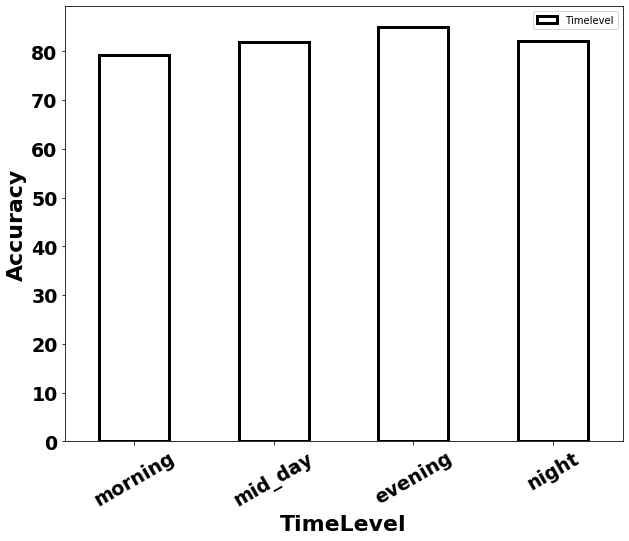

In [26]:
import pandas as pd
d_acc={'Timelevel':[79.28,81.87,84.97,82.07]}
d_acc_d=pd.DataFrame(d_acc)

ax=d_acc_d.plot.bar(rot=30,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3)
#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Accuracy')
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['morning','mid_day','evening','night'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('TimeLevel',fontsize=22,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=22,fontweight='bold')

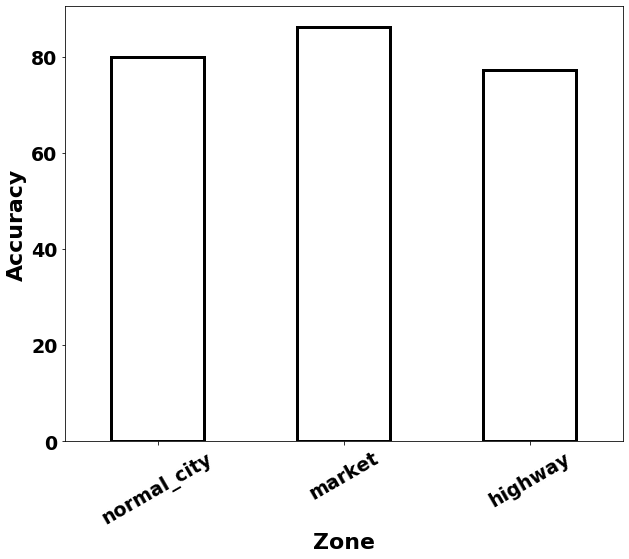

In [25]:
import pandas as pd
d_acc={'Zone':[79.89,86.12,77.19]}
d_acc_d=pd.DataFrame(d_acc)

ax=d_acc_d.plot.bar(rot=30,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3)
#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['normal_city','market','highway'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=22,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=22,fontweight='bold')
ax.get_legend().remove()

Text(0, 0.5, 'Accuracy')

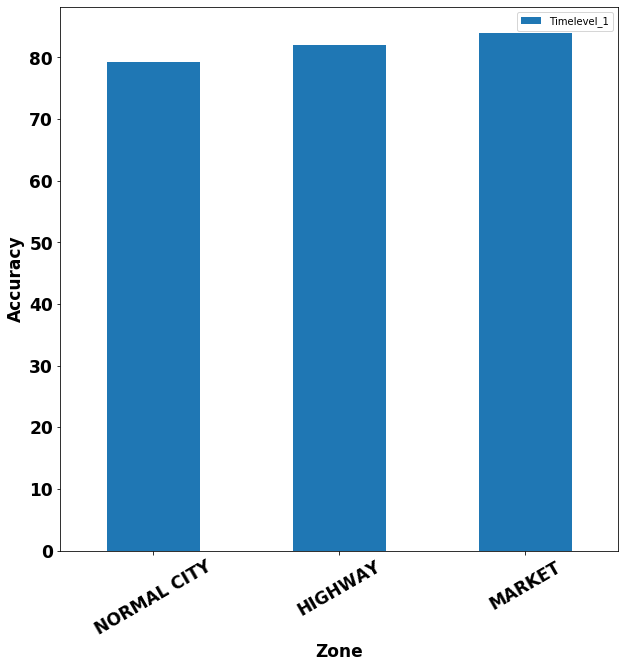

In [29]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[79.26,82.09,83.97]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[72.78,75.89,87.31]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.4,82.81,89.10]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[84.69,70.31,82.09]}
d_4_d=pd.DataFrame(d_4)
#d_acc={'Timelevel':[74,78,84,77]}
#d_acc_d=pd.DataFrame(d_acc)

ax = d_1_d.plot.bar(rot=30,figsize=(10,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL CITY','HIGHWAY','MARKET'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')

Text(0, 0.5, 'Accuracy')

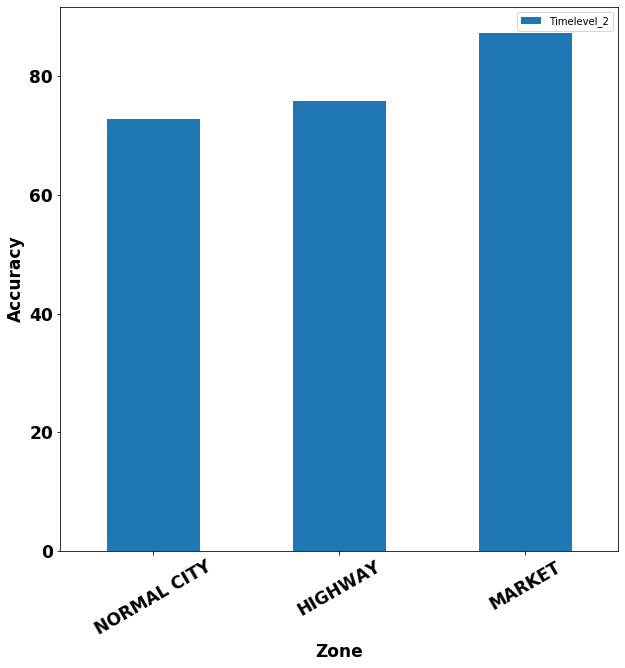

In [32]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[79.26,82.09,83.97]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[72.78,75.89,87.31]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.4,82.81,89.10]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[84.69,70.31,82.09]}
d_4_d=pd.DataFrame(d_4)
#d_acc={'Timelevel':[74,78,84,77]}
#d_acc_d=pd.DataFrame(d_acc)

ax = d_2_d.plot.bar(rot=30,figsize=(10,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL CITY','HIGHWAY','MARKET'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')

Text(0, 0.5, 'Accuracy')

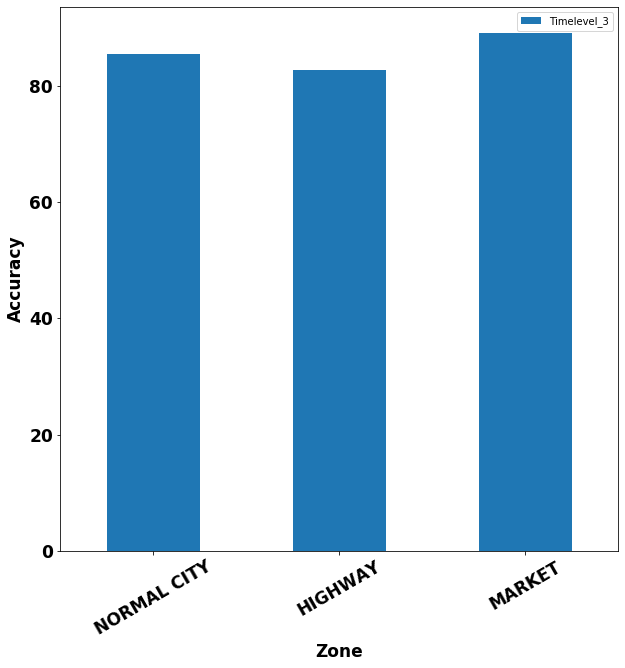

In [33]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[79.26,82.09,83.97]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[72.78,75.89,87.31]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.4,82.81,89.10]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[84.69,70.31,82.09]}
d_4_d=pd.DataFrame(d_4)
#d_acc={'Timelevel':[74,78,84,77]}
#d_acc_d=pd.DataFrame(d_acc)

ax = d_3_d.plot.bar(rot=30,figsize=(10,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL CITY','HIGHWAY','MARKET'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')

Text(0, 0.5, 'Accuracy')

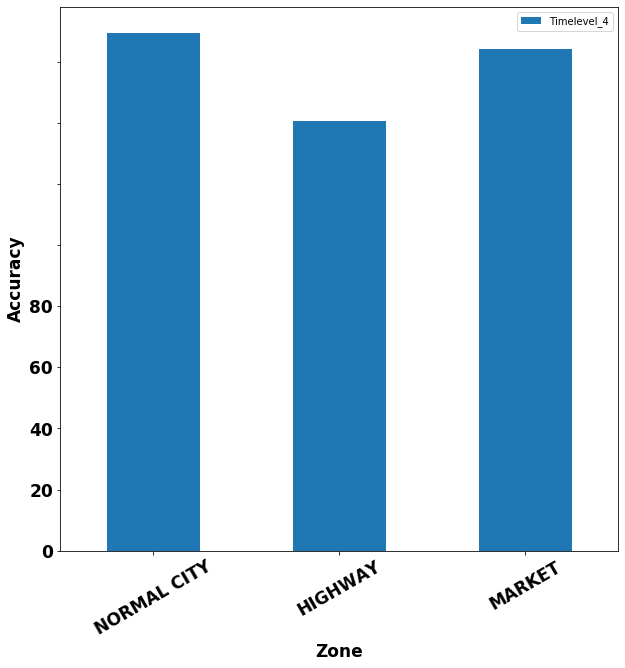

In [34]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[79.26,82.09,83.97]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[72.78,75.89,87.31]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.4,82.81,89.10]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[84.69,70.31,82.09]}
d_4_d=pd.DataFrame(d_4)
#d_acc={'Timelevel':[74,78,84,77]}
#d_acc_d=pd.DataFrame(d_acc)

ax = d_4_d.plot.bar(rot=30,figsize=(10,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL CITY','HIGHWAY','MARKET'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')

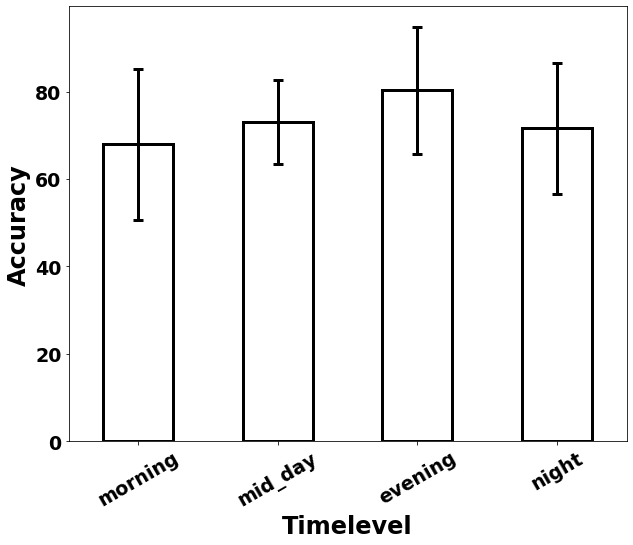

In [37]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,72.78,85.4,84.69],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
d_total=[[60,75.55,85.09,68.7],[56,81,91.7,87.78],[87.73,62.4,64,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[82.09,87.31,89.09,82.09]
d_m_d=pd.DataFrame(d_m)
d_h=[83.97,75.89,82.81,70.31]
d_h_d=pd.DataFrame(d_h)
d_n=[79.26,72.78,85.4,84.69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

total_mean=d_total_d.mean()
total_mean_d=pd.DataFrame(total_mean)
total_std=d_total_d.std()
total_std_d=pd.DataFrame(total_std)

#print(total_mean)
#rint(total_std)
#print(m_mean)
#print(h_mean)
#print(n_mean)

#print(m_std)
#print(h_std)
#print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=total_mean_d.plot.bar(yerr=total_std_d,rot=30,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3,error_kw=dict(lw=3,capsize=5,capthick=3))

#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Mean Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['morning','mid_day','evening','night'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Timelevel',fontsize=24,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()

          0
0  5.850865
1  5.866569
2  3.170167
         0
0  80.5325
1  77.7750
2  85.6175


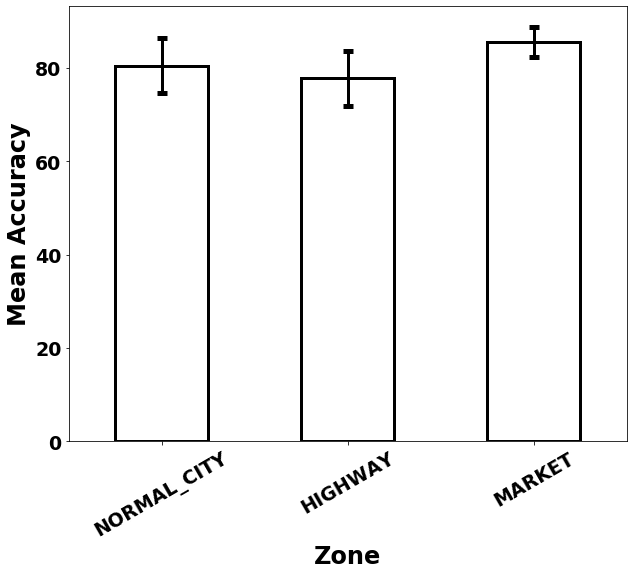

In [39]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[79.26,82.09,83.97],[72.78,75.89,87.31],[85.4,82.81,89.10],[84.69,70.31,82.09]]
#d_total=[[60,75.55,85.09,68.7],[56,81,91.7,87.78],[87.73,62.4,64,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

total_mean=d_total_d.mean()
total_mean_d=pd.DataFrame(total_mean)
total_std=d_total_d.std()
total_std_d=pd.DataFrame(total_std)
print(total_std_d)

print(total_mean_d)

#print(total_mean)
#rint(total_std)
#print(m_mean)
#print(h_mean)
#print(n_mean)

#print(m_std)
#print(h_std)
#print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=total_mean_d.plot.bar(yerr=total_std_d,rot=30,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3,error_kw=dict(lw=3,capsize=5,capthick=5))

#ax.set_xticklabels(['Normal_city','Market','Highway'])
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL_CITY','HIGHWAY','MARKET'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=24,fontweight='bold')
ax.set_ylabel('Mean Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()


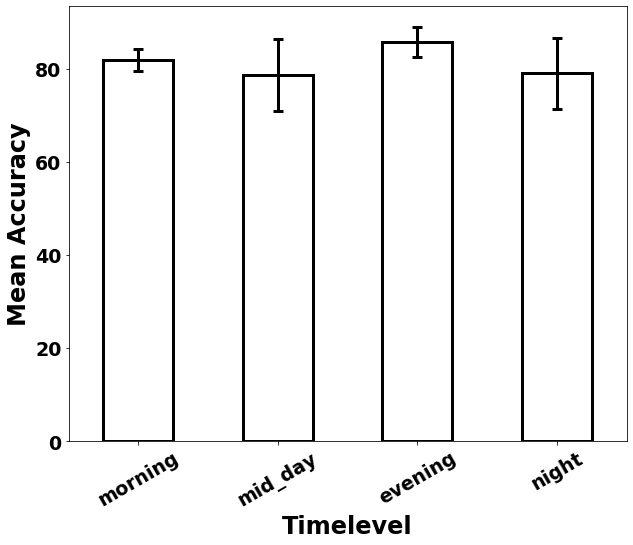

In [42]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,56,87.73],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
d_total=[[79.26,72.78,85.4,84.69],[83.97,75.89,82.81,70.31],[82.09,87.31,89.09,82.09]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

total_mean=d_total_d.mean()
total_mean_d=pd.DataFrame(total_mean)
total_std=d_total_d.std()
total_std_d=pd.DataFrame(total_std)

#print(total_mean)
#rint(total_std)
#print(m_mean)
#print(h_mean)
#print(n_mean)

#print(m_std)
#print(h_std)
#print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=total_mean_d.plot.bar(yerr=total_std_d,rot=30,figsize=(10,8),legend='none',color=(0,0,0,0),edgecolor='black',linewidth=3,error_kw=dict(lw=3,capsize=5,capthick=3))

#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Mean Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['morning','mid_day','evening','night'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Timelevel',fontsize=24,fontweight='bold')
ax.set_ylabel('Mean Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()

